In [35]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from wand.image import Image
import matplotlib.image as mpimg
from GammaE import GammaNoise

In [36]:
def open_image(image_name, type_noise):
    img = mpimg.imread(image_name)
    plt.figure(figsize=(8, 6))  
    plt.imshow(img)              
    plt.axis('off')              
    plt.title(type_noise) 
    plt.show()

In [37]:
def additive_noise (type_noise, attenuate, image_name):
    with Image(filename ='scull.jpg') as img:
        img.noise(type_noise, attenuate = attenuate)
        img.save(filename = image_name)
    f = cv2.imread(image_name)
    cv2.imwrite(image_name, f)
    open_image(image_name, type_noise)

In [38]:
def Histogram_noise(noise_name):
    img = cv2.imread(noise_name, cv2.IMREAD_GRAYSCALE)
    hist,bins = np.histogram(img.flatten(),256,[0,256])
    plt.hist(img.flatten(),256,[0,256], color = 'r')
    plt.xlim([0,256])
    plt.show()

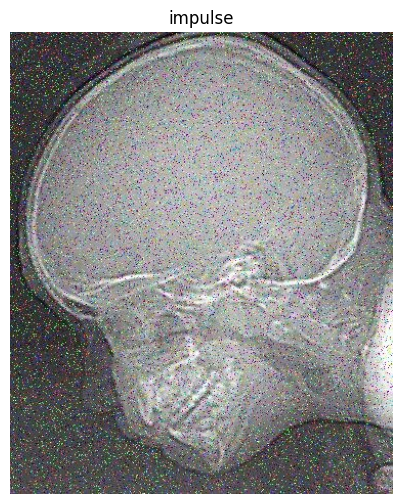

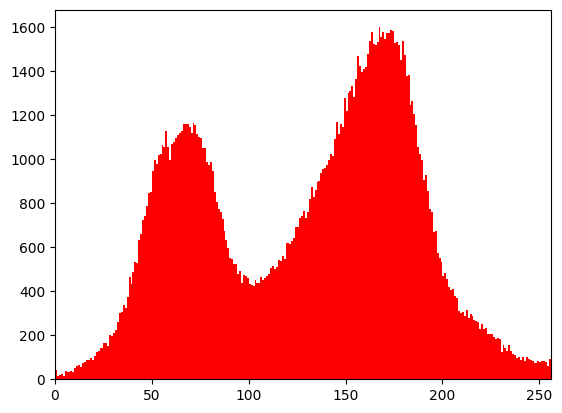

In [49]:
additive_noise('impulse', 0.9, 'impulse_noise.jpg')
Histogram_noise('impulse_noise.jpg')

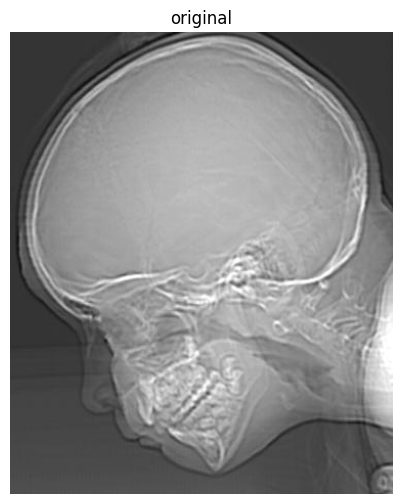

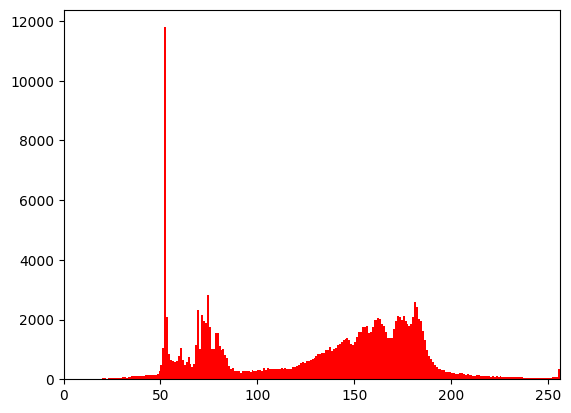

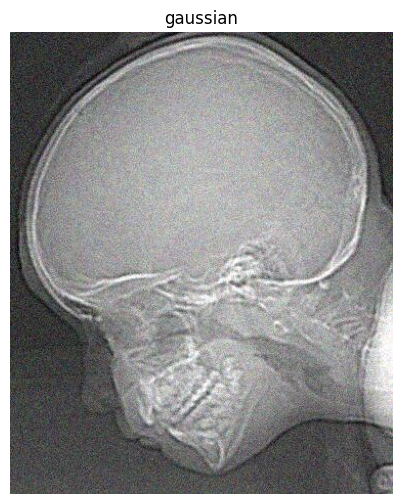

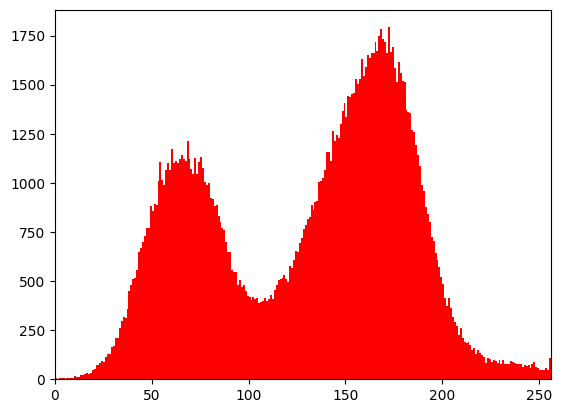

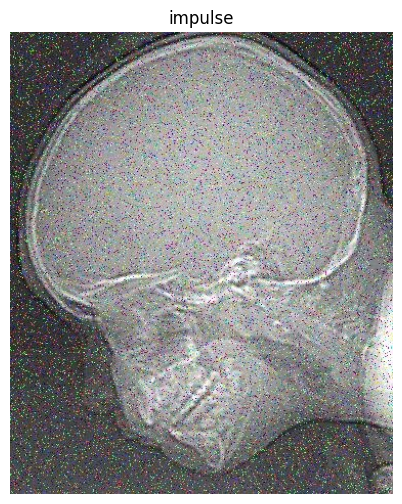

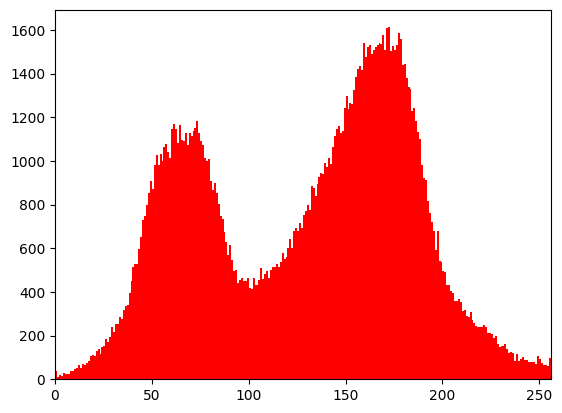

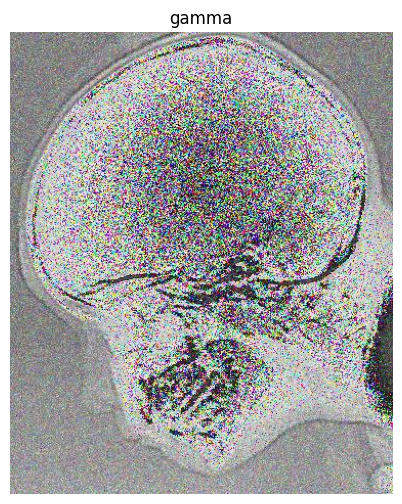

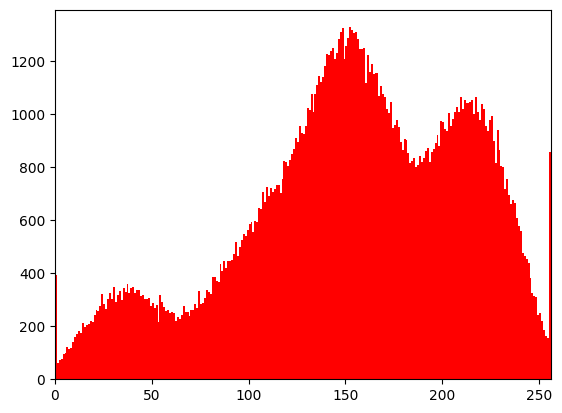

In [39]:
open_image('scull.jpg', 'original')
Histogram_noise('scull.jpg')
additive_noise('gaussian', 0.9, 'gaussian_noise.jpg')
Histogram_noise('gaussian_noise.jpg')
additive_noise('impulse', 0.9, 'impulse_noise.jpg')
Histogram_noise('impulse_noise.jpg')
GammaNoise('scull.jpg', 1, 8, 'gamma_noise.jpg')
Histogram_noise('gamma_noise.jpg')



In [40]:
def plot_open (name, noise_name):
    plt.figure(figsize=(8, 6))
    plt.axis('off')
    plt.imshow(name, cmap='gray') 
    plt.title(noise_name)


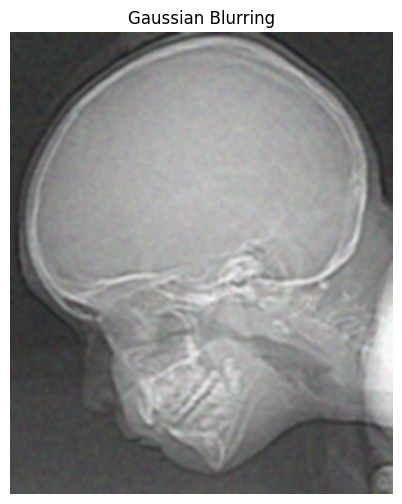

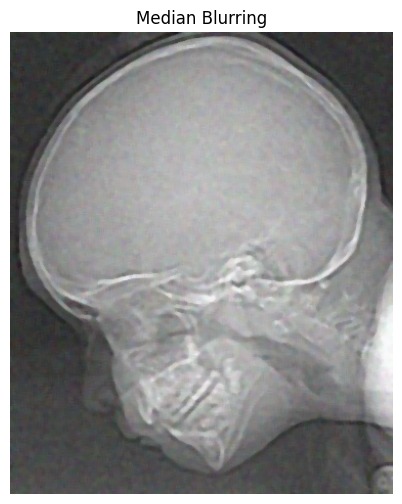

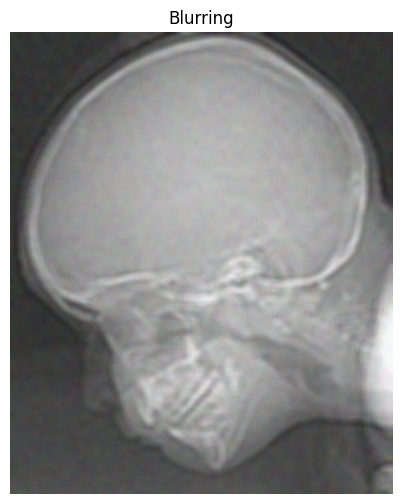

In [50]:
img_gaussian = cv2.imread('gaussian_noise.jpg')

kernel = np.ones((5,5), np.float32) / 25
w = cv2.filter2D(img_gaussian, -1, kernel)
plot_open(w,'Gaussian Blurring')

median = cv2.medianBlur(img_gaussian, 5) 
plot_open(median,'Median Blurring')

sred = cv2.blur(img_gaussian, (7,7))
plot_open(sred,'Blurring')


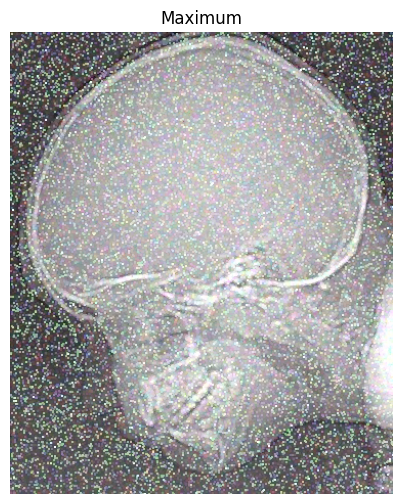

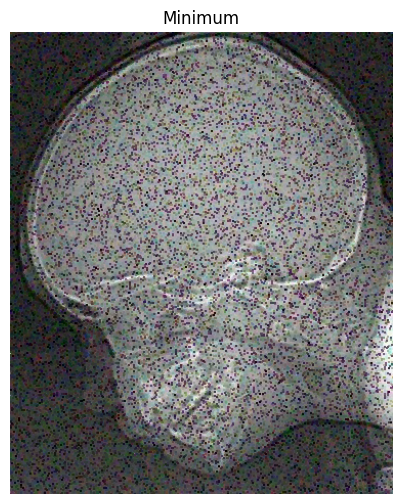

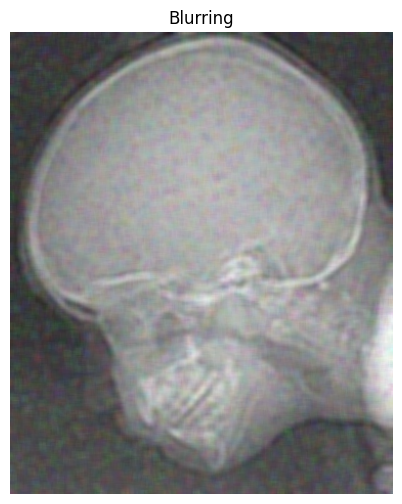

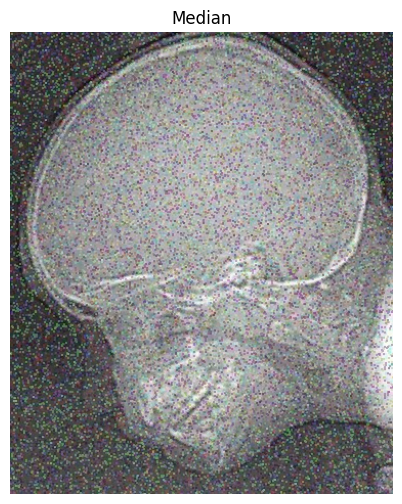

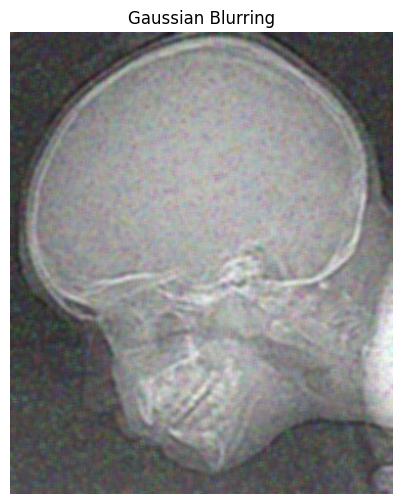

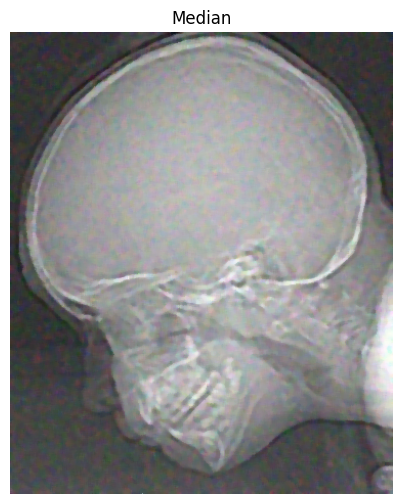

In [52]:
img_impulse = cv2.imread('impulse_noise.jpg')
kernel = cv2.getStructuringElement (cv2.MORPH_RECT, (2, 2)) 

maximum = cv2.dilate(img_impulse, kernel)
plot_open(maximum,'Maximum')

minimum = cv2.erode(img_impulse, kernel)
plot_open(minimum, 'Minimum')

sred = cv2.blur(img_impulse, (7,7))
plot_open(sred,'Blurring')

# Вычисление среднего арифметического
median_filter_result = (maximum.astype(np.float32) + minimum.astype(np.float32)) / 2
# Приведение результата к диапазону [0..255]
median_filter_result = np.clip(median_filter_result, 0, 255).astype(np.uint8)
plot_open(median_filter_result, 'Median')

kernel = np.ones((5,5), np.float32) / 25
w = cv2.filter2D(img_impulse, -1, kernel)
plot_open(w,'Gaussian Blurring')

median = cv2.medianBlur(img_impulse, 5) 
plot_open(median,'Median')

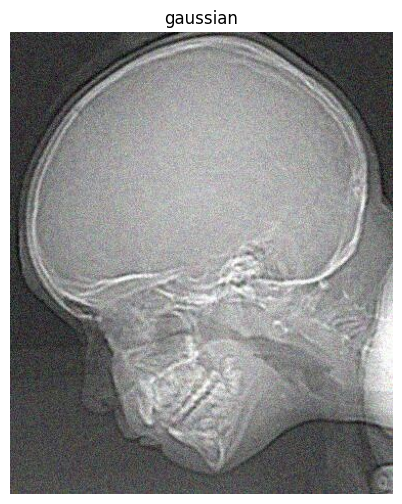

c:\Users\yulia\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\signal\_signaltools.py:1611: RuntimeWarning: divide by zero encountered in divide
  res *= (1 - noise / lVar)
c:\Users\yulia\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\signal\_signaltools.py:1611: RuntimeWarning: invalid value encountered in multiply
  res *= (1 - noise / lVar)


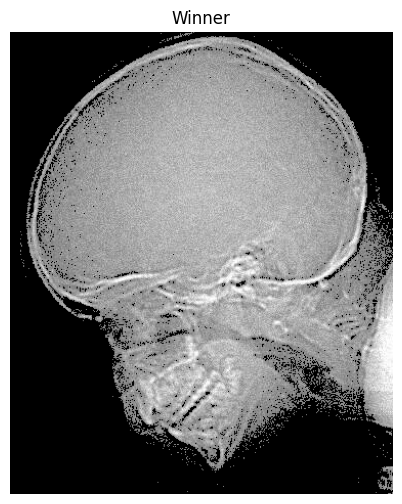

In [51]:
from scipy.signal import wiener
# # Загрузка изображения черепа
# image = cv2.imread('gaussian_noise.jpg')  # Укажите путь к вашему изображению
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# # Применение гауссового размытия
# blurred_image = cv2.GaussianBlur(image, (15, 15), 0)
# cv2.imwrite('blurred.jpg', blurred_image)
# #blurred_image = cv2.cvtColor(blurred_image, cv2.COLOR_BGR2GRAY)

# # Отображение изображений
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 3, 2)
# plt.title('Размытие')
# plt.imshow(blurred_image)
# plt.axis('off')

additive_noise('gaussian', 0.9, 'gaussian_noise.jpg')
f = cv2.imread('gaussian_noise.jpg')
f = cv2.cvtColor(f, cv2.COLOR_BGR2GRAY)

winner = wiener(f, mysize = (1,1))
ret, win = cv2.threshold(winner, 120, 255, cv2.THRESH_TOZERO)
plot_open(win,'Winner')






In [44]:
import cv2
import numpy as np
import matplotlib.pyplot as plt




